<a href="https://colab.research.google.com/github/Umobit/Python-Project/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [11]:
heart_disease = pd.read_csv('/content/heartdisease_u5z_lx9fv (2).csv')

In [12]:
#
heart_disease.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [13]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [14]:
heart_disease.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [15]:
heart_disease.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
BMI,0
Smoker,0
Diabetes,0
PhysActivity,0
Fruits,0
Veggies,0
HvyAlcoholConsump,0


In [16]:
heart_disease.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
253675,False
253676,False
253677,False
253678,False


In [19]:
scaler = StandardScaler()
sc = scaler.fit_transform(heart_disease)

In [20]:
sc

array([[-0.3224576 ,  1.15368814,  1.16525449, ...,  0.31690008,
        -1.06559465, -1.4744874 ],
       [-0.3224576 , -0.86678537, -0.85818163, ..., -0.33793279,
         0.96327159, -2.44013754],
       [-0.3224576 ,  1.15368814,  1.16525449, ...,  0.31690008,
        -1.06559465,  0.93963796],
       ...,
       [-0.3224576 , -0.86678537, -0.85818163, ..., -1.97501498,
        -0.05116153, -1.95731247],
       [-0.3224576 ,  1.15368814, -0.85818163, ..., -0.33793279,
        -0.05116153, -2.44013754],
       [ 3.10118294,  1.15368814,  1.16525449, ...,  0.31690008,
         0.96327159, -1.95731247]])

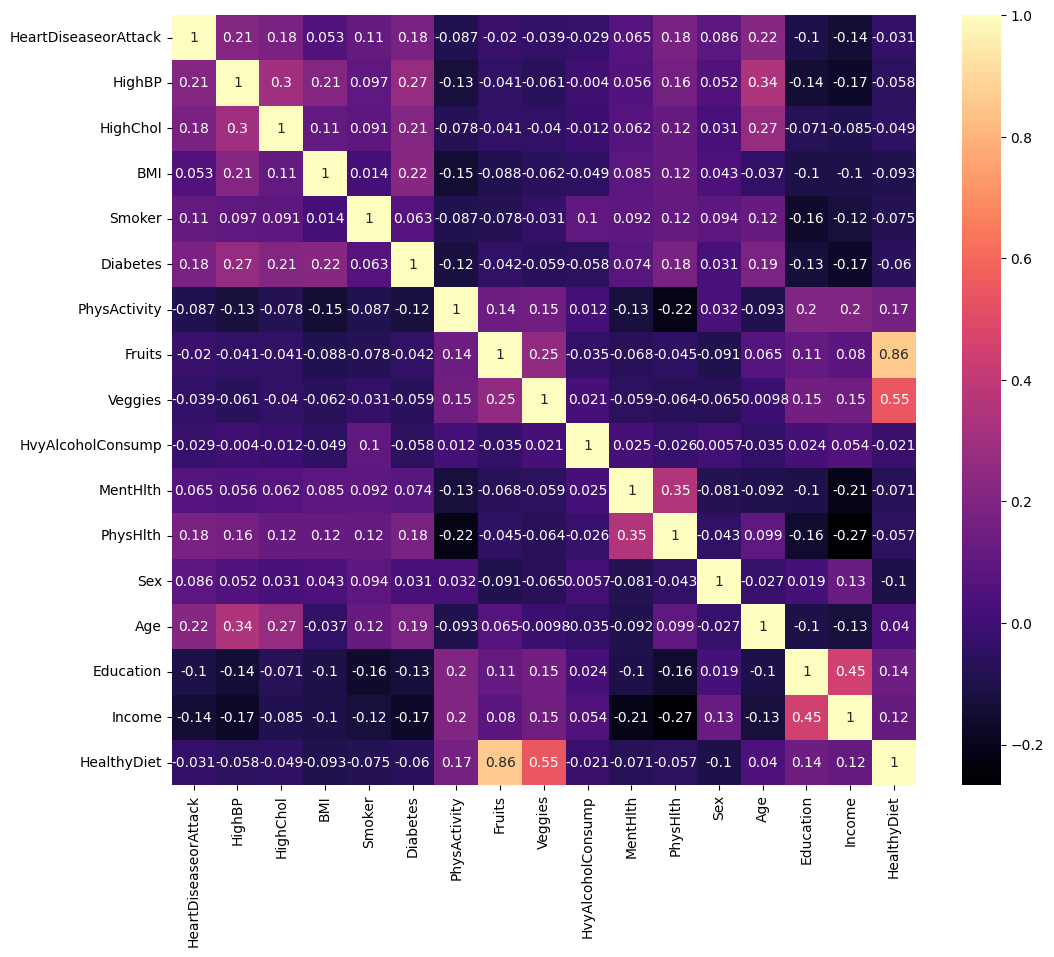

In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(heart_disease.corr(), annot=True, cmap='magma')
plt.show()

In [26]:
heart_disease['HealthyDiet'] = np.logical_and(heart_disease['Fruits'] > 0, heart_disease['Veggies'] > 0)

In [27]:
heart_disease['HealthyDiet']

,HealthyDiet
0,False
1,False
2,False
3,True
4,True
...,...
253675,True
253676,False
253677,False
253678,True


In [28]:
X = heart_disease.drop('HeartDiseaseorAttack', axis=1)
y = heart_disease['HeartDiseaseorAttack']

In [30]:
X

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income,HealthyDiet
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0,False
1,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,False
2,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0,False
3,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,True
4,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0,True
253676,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0,False
253677,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,False
253678,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,True


In [31]:
y

,HeartDiseaseorAttack
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
253675,0.0
253676,0.0
253677,0.0
253678,0.0


In [32]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [35]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [38]:
y_pred = pipeline.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     46033
         1.0       0.97      0.91      0.94     45882

    accuracy                           0.94     91915
   macro avg       0.94      0.94      0.94     91915
weighted avg       0.94      0.94      0.94     91915



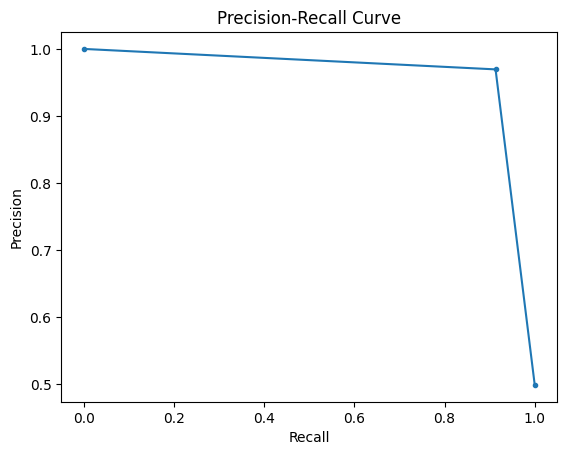

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [41]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_
features = X.columns
feature_heart_disease_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_heart_disease_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_heart_disease_df)

              Feature  Importance
1            HighChol    0.153812
0              HighBP    0.148397
12                Age    0.141190
3              Smoker    0.087714
2                 BMI    0.081894
11                Sex    0.077112
14             Income    0.062953
13          Education    0.050316
5        PhysActivity    0.045089
10           PhysHlth    0.043728
4            Diabetes    0.028932
9            MentHlth    0.023811
7             Veggies    0.019139
6              Fruits    0.018668
8   HvyAlcoholConsump    0.010579
15        HealthyDiet    0.006667
